# Import Libraries

In [ ]:
pip install nsepy

In [2]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

## Getting the Data

In [3]:
# Load data from NsePY
data=get_history(symbol="JKPAPER", start=date(2012,9,1), end=date(2022,8,30))
# Save data to CSV file
#data.to_csv('Stock.csv')


In [4]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-08-24,JKPAPER,EQ,414.45,416.0,433.75,415.8,428.05,429.15,426.99,2878667,1.229173e+14,40507,484828,0.1684
2022-08-25,JKPAPER,EQ,429.15,432.9,439.20,415.1,417.20,417.30,425.48,2308805,9.823405e+13,35428,736349,0.3189
2022-08-26,JKPAPER,EQ,417.30,421.0,424.00,412.1,415.70,414.70,416.01,1113077,4.630542e+13,21670,289371,0.2600
2022-08-29,JKPAPER,EQ,414.70,404.4,422.60,400.0,418.00,416.70,414.96,1784457,7.404700e+13,29220,326213,0.1828
2022-08-30,JKPAPER,EQ,416.70,420.5,424.00,417.0,419.00,419.45,420.23,767786,3.226446e+13,11488,248762,0.3240


In [5]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 2012-09-03 to 2022-08-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2473 non-null   object 
 1   Series              2473 non-null   object 
 2   Prev Close          2473 non-null   float64
 3   Open                2473 non-null   float64
 4   High                2473 non-null   float64
 5   Low                 2473 non-null   float64
 6   Last                2473 non-null   float64
 7   Close               2473 non-null   float64
 8   VWAP                2473 non-null   float64
 9   Volume              2473 non-null   int64  
 10  Turnover            2473 non-null   float64
 11  Trades              2473 non-null   int64  
 12  Deliverable Volume  2473 non-null   int64  
 13  %Deliverble         2473 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 289.8+ KB


In [6]:
# Get descriptive statistics summary of data set 
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.00000,2473.000000,2.473000e+03,2.473000e+03,2473.000000,2.473000e+03,2473.000000
mean,104.262899,104.587364,106.879034,102.412131,104.433360,104.41856,104.744581,8.339227e+05,1.359446e+13,8055.855641,3.021122e+05,0.501756
std,77.974870,78.200534,80.162605,76.341157,78.244824,78.21940,78.377529,1.417501e+06,3.230116e+13,13828.378650,3.470489e+05,0.169401
min,23.900000,23.800000,24.500000,23.600000,23.800000,23.90000,23.970000,1.690000e+03,5.986130e+09,21.000000,1.186000e+03,0.074600
25%,36.200000,36.250000,37.250000,35.750000,36.250000,36.25000,36.410000,1.070460e+05,4.086074e+11,587.000000,6.138600e+04,0.379400
50%,94.250000,94.650000,96.300000,93.000000,94.500000,94.40000,94.670000,4.551690e+05,4.644173e+12,4200.000000,2.071850e+05,0.493700
75%,138.550000,138.600000,141.750000,136.000000,138.450000,138.55000,138.580000,9.423610e+05,1.308710e+13,9746.000000,4.021360e+05,0.615600
max,447.050000,447.950000,449.950000,432.300000,446.000000,447.05000,440.620000,1.966367e+07,4.262459e+14,171746.000000,3.391383e+06,0.998400


In [7]:
# Display features in data set
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

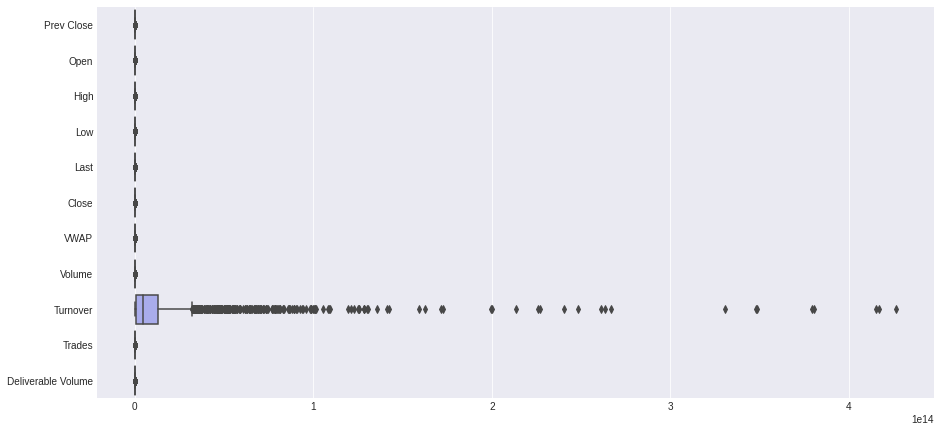

In [8]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data.iloc[:, 0:13], orient = 'h')

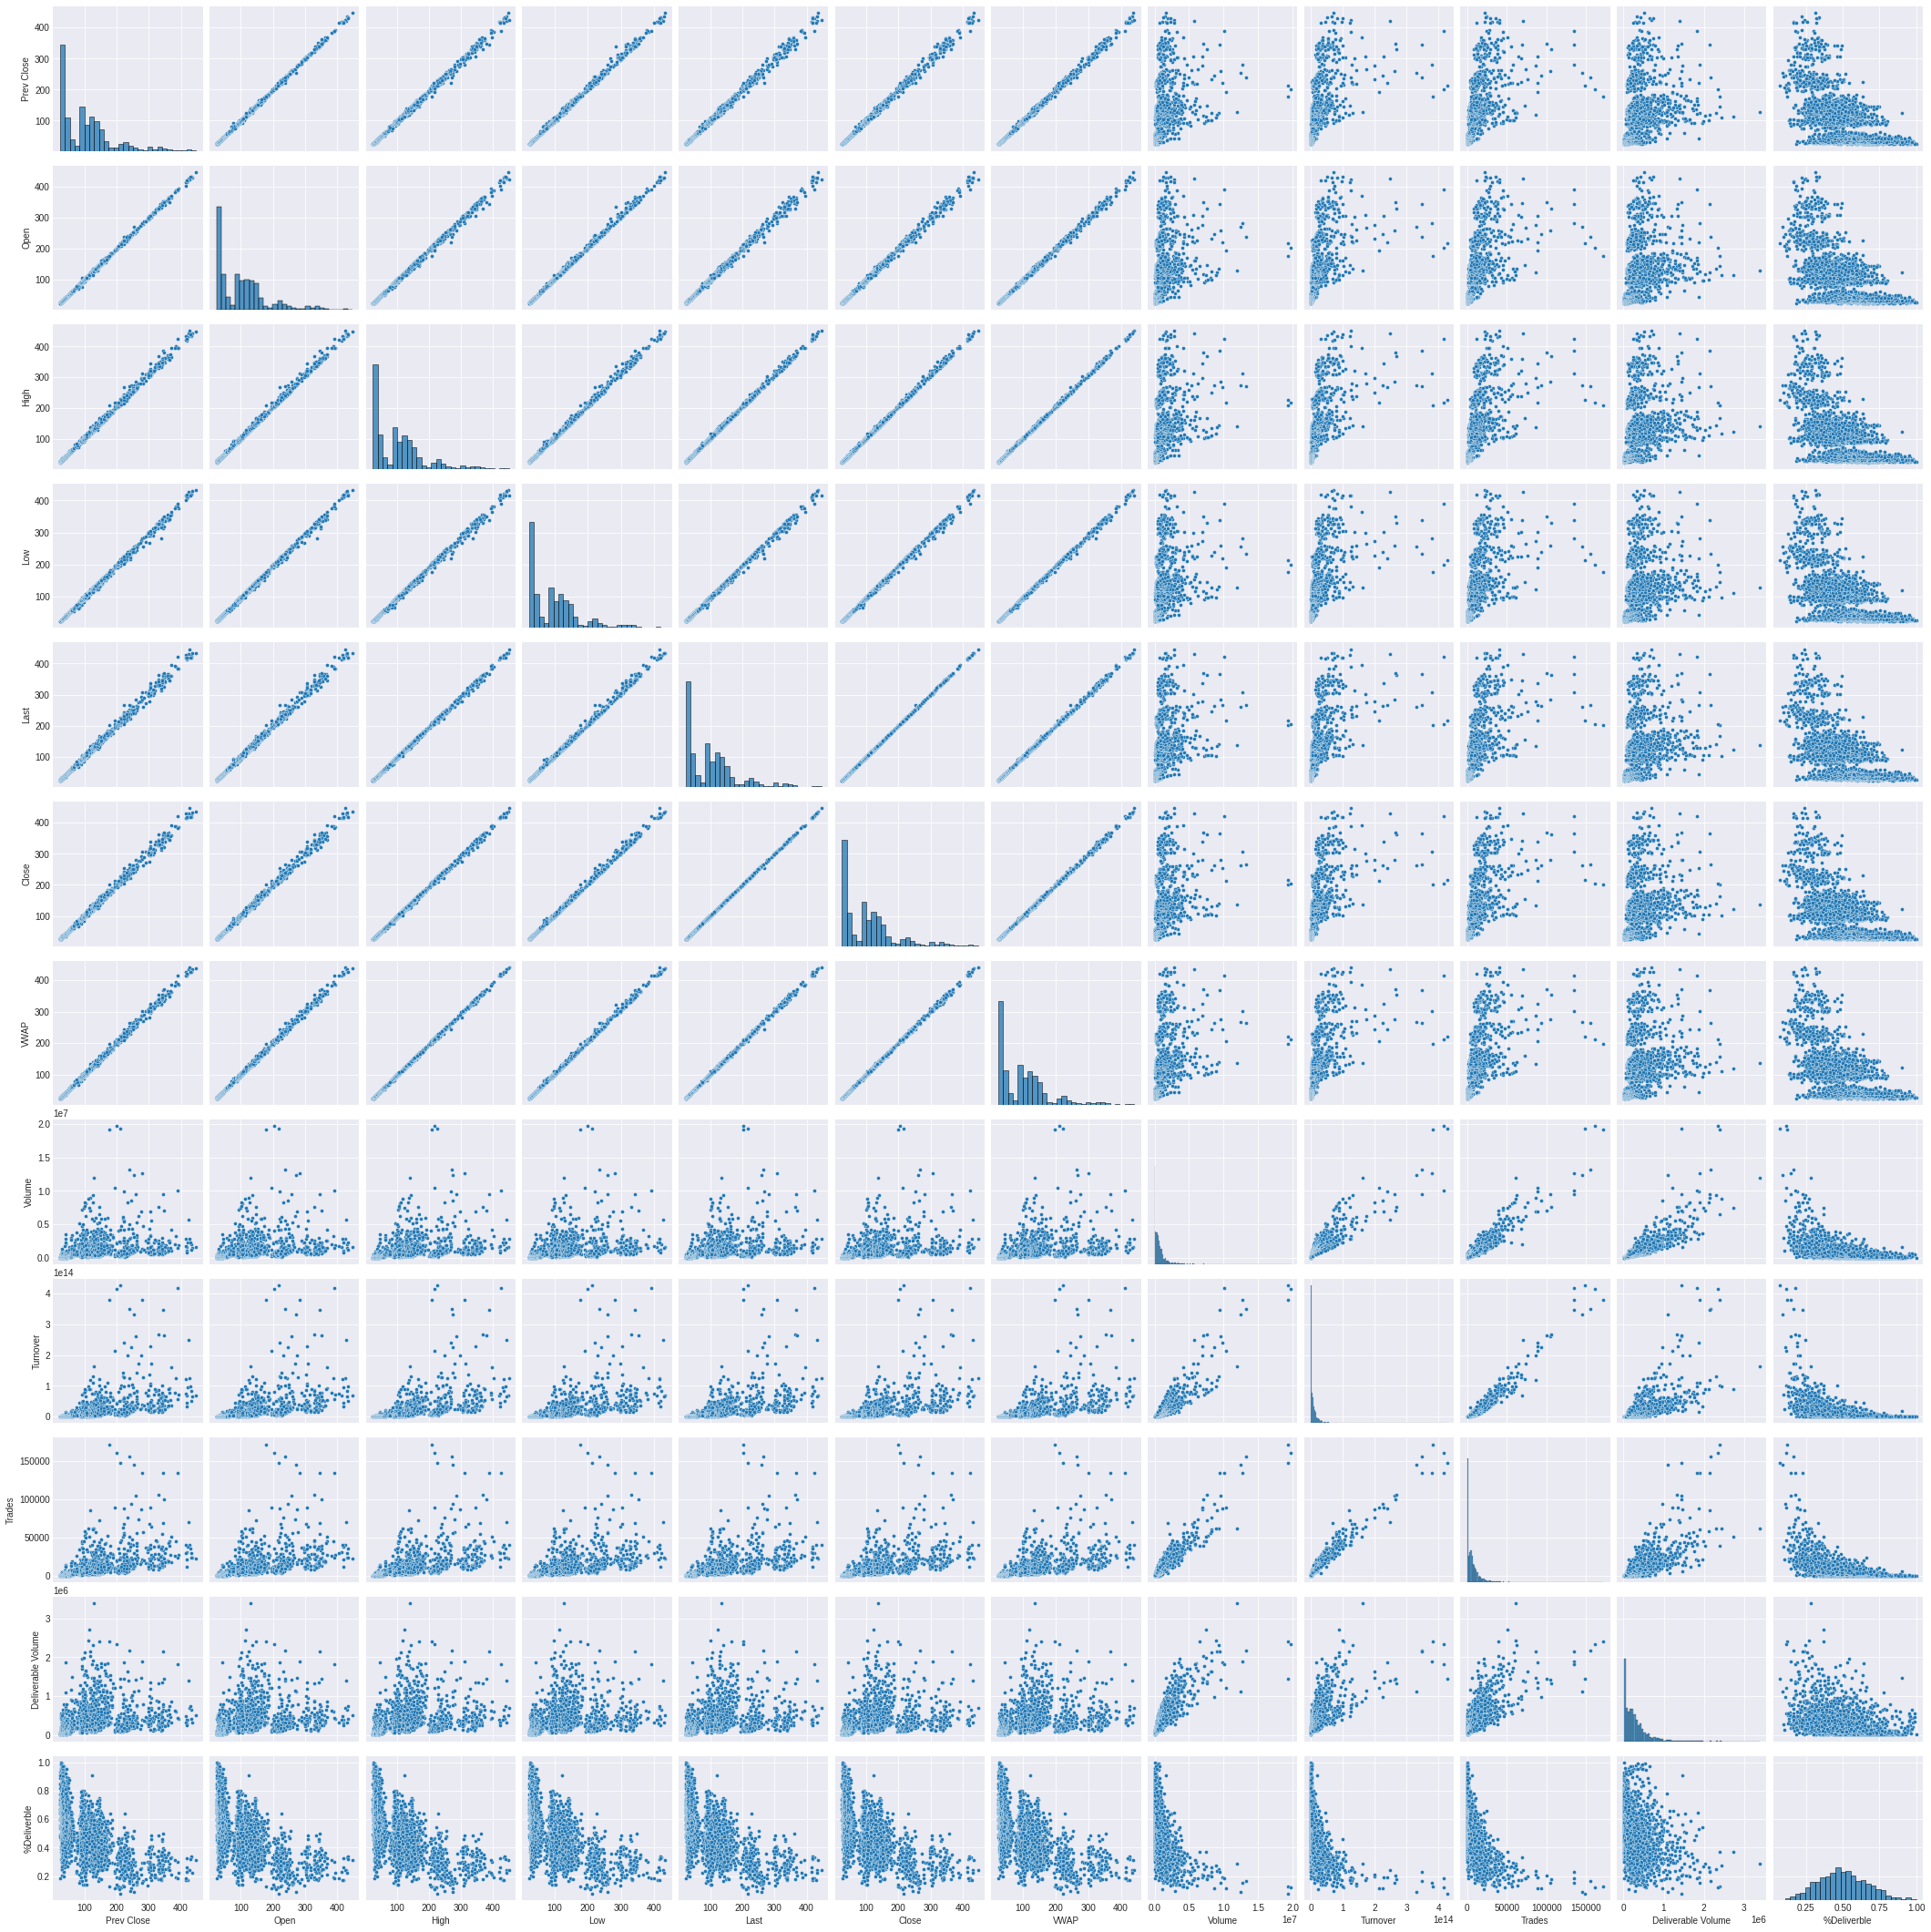

In [9]:
sns.pairplot(data)

##Select Subset with relevant features

We use the daily closing price Close as the value to predict, so we can discard the other features.

'**Close**' column has numerical data type
The 'Date' is the index column and contains datetime values

In [10]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [11]:
df.head()

,Date,Close
0,2012-09-03,34.20
1,2012-09-04,34.85
2,2012-09-05,35.10
3,2012-09-06,35.40
4,2012-09-07,35.60


In [12]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2473 non-null   object 
 1   Close   2473 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.8+ KB


In [13]:
# Check for missing values in the columns
df.isna().values.any()

False

##Explore the Data

When we take a look at the price movement over time by simply plotting the Closing price vs Time, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

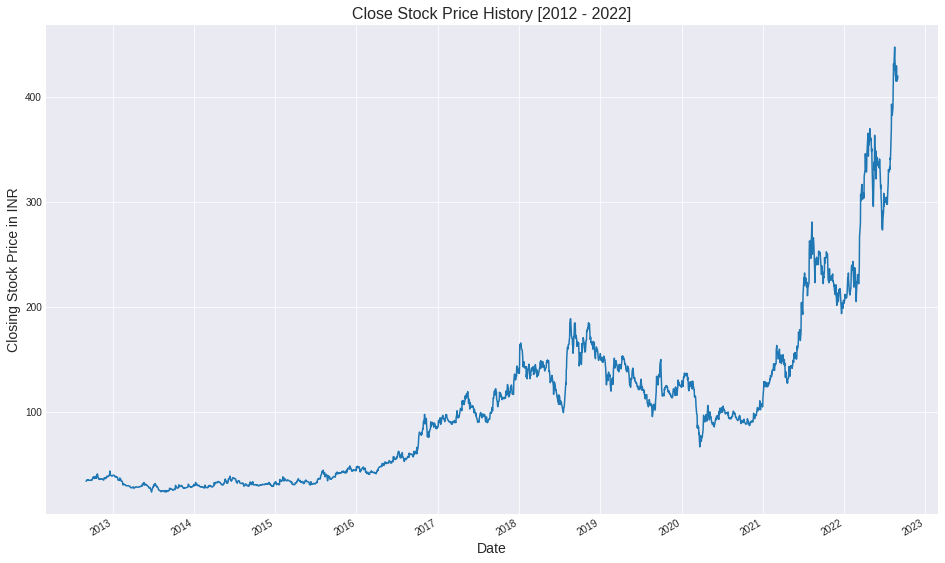

In [14]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2012 - 2022]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in INR', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

##Linear Regression

Our data contains only one independent variable () which represents the date and the dependent variable () we are trying to predict is the Stock Price. To fit a line to the data points, which then represents an estimated relationship between  and , we can use a Simple Linear Regression.

The best fit line can be described with

where

 is the predicted value of the dependent variable
 is the y-intercept
 is the slope
 is the value of the independent variable

The goal is to find such coefficients 
 and 
 that the Sum of Squared Errors, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

##Training a Linear Regression Model

#Train Test Split

In [16]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [17]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

#Create and Train the Model

In [18]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [19]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [20]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

#Model Evaluation

In [21]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.09252038801812998
Intercept:  -9.654886990509183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


Interpreting the coefficients:

The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.0925 INR

The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

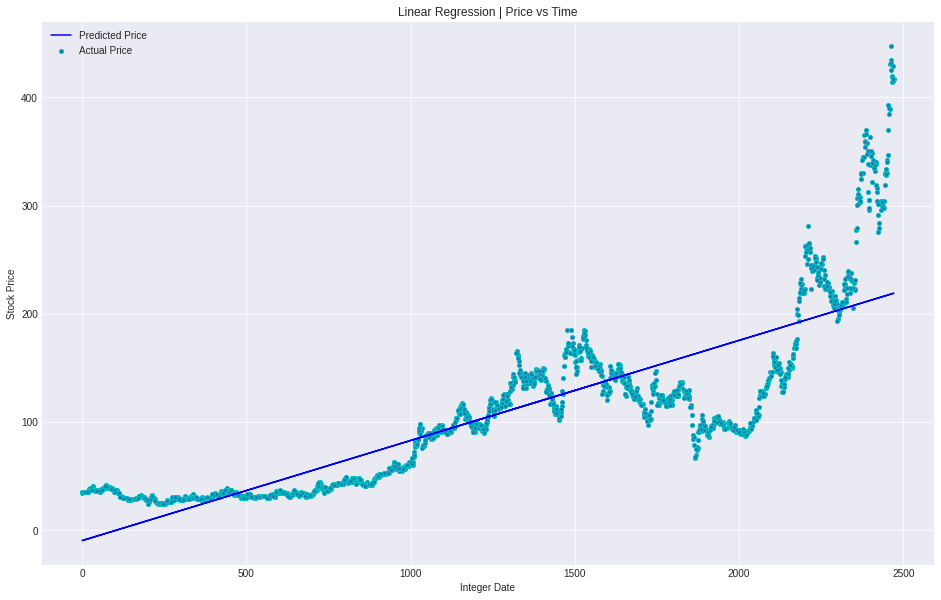

In [22]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='c', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='b', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Prediction from our Model

In [23]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [24]:
# Generate array with predicted values
y_pred = model.predict(X_test)

##Regression Evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set

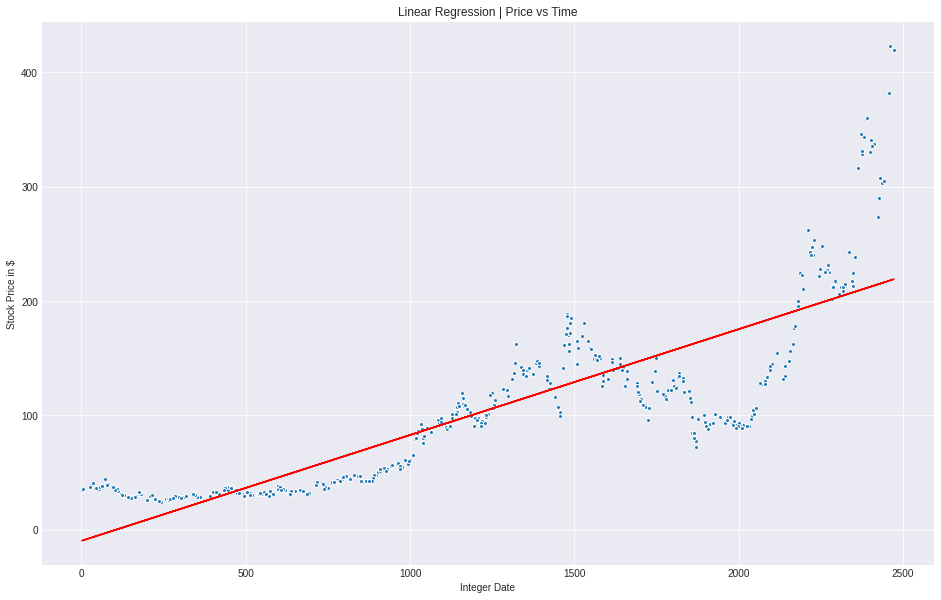

In [25]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

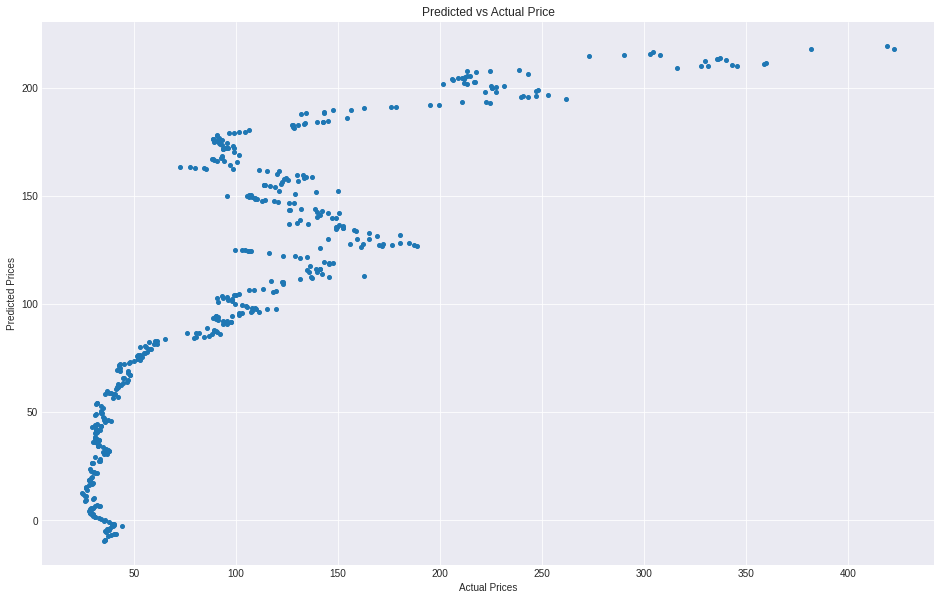

In [26]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good.

Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.
Also in the area around 85 - 110 the data point are spread out quite heavily and the predictions don't cover the values above 100.

#Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


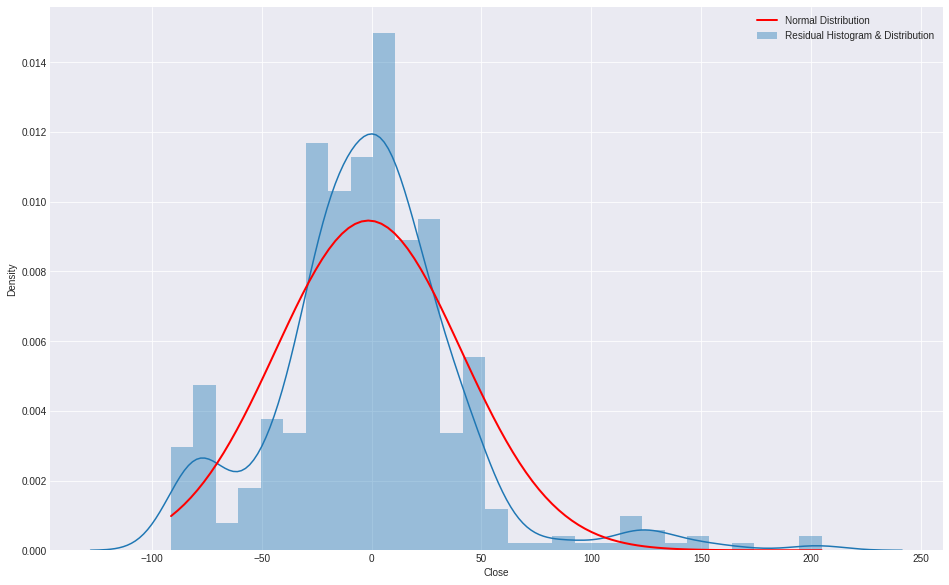

In [27]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [28]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [29]:
df.head()

,Date,Close,Prediction
0,2012-09-03,34.20,-9.654887
1,2012-09-04,34.85,-9.562367
2,2012-09-05,35.10,-9.469846
3,2012-09-06,35.40,-9.377326
4,2012-09-07,35.60,-9.284805


Error Evaluation Metrics
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
 

Mean Squared Error (MSE) is the mean of the squared errors:
 

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
 

All of these are cost functions we want to minimize.

All of these are cost functions we want to minimize.

In [30]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [31]:
# Statistical summary of test data
df['Close'].describe()

count    2473.00000
mean      104.41856
std        78.21940
min        23.90000
25%        36.25000
50%        94.40000
75%       138.55000
max       447.05000
Name: Close, dtype: float64

In [32]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.865452957453996
Mean Squared Error: 1781.6490857713113
Root Mean Squared Error: 42.209585235717626


In [33]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.6848010070613053


In [34]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.6851515449407175

The value of  shows that are model accounts for nearly 68% of the differences between the actual stock prices and the predicted prices.